In [2]:
# imports
import requests
from IPython.display import JSON 
import pandas as pd
import os
import requests
import json
import matplotlib

# Foursquare

In [ ]:
## part 2

In [30]:
# import data from city_bikes - part 1
mtl_stations = pd.read_csv('../data/stations_data.csv')
mtl_stations['latitude'][0]


mtl_stations


,station ids,latitude,longitude,free bikes,empty slots,total bikes
0,72bfd647b3d2b650546f42319729757d,45.617500,-73.606011,2,9,11
1,36c6491aa1b52e5ef7005f984738de27,45.516926,-73.564257,3,10,13
2,30f081e03c42b3e7b3a5c4cd5acc3286,45.541549,-73.565012,3,9,12
3,8db822a266b5ccb3a1e323ddc8721d62,45.506176,-73.711186,7,12,19
4,660275cd7d4368cc7590f1606c633bd6,45.512994,-73.682498,7,14,21
5,fddada5adc997290212b3f540c017274,45.514734,-73.691449,1,14,15
6,83d02cd8a043b8305a4031063005d32e,45.522341,-73.721679,0,15,15
7,888e6052f1aebab8d8a527776b3499b6,45.566869,-73.641017,2,12,14


In [33]:
len(mtl_stations['station ids'])
mtl_stations.shape[0]

8

In [34]:
# extract data from Foursquare API

def get_bars(lat, long):
    url = "https://api.foursquare.com/v3/places/search"
    params = {
  	"query": "restaurant",
  	"ll": str(lat)+","+str(long),
  	"sort":"DISTANCE",
    "fields": 'name,rating,price,popularity,distance',
    "radius":"1000",
    "limit": 50}
    headers = {
    "Accept": "application/json",
    "Authorization": "fsq3abwKJ6iVdOjAznwWfKSu32hz7kDliaypJENWAblWw40="}
    response = requests.request("GET", url, params=params, headers=headers)
    # return name and address
    # print('get_bars function ran')
    return response.json()

In [35]:
output = []
for row in range(len(mtl_stations)):
    result = get_bars(mtl_stations['latitude'][row],mtl_stations['longitude'][row])
    # store results somewhere
    output.append(result)


In [36]:
# foursquare results for each city bike's station location
JSON(output)

<IPython.core.display.JSON object>

In [18]:
restaurant_count = []
for item in output:
    print(len(item['results']))
    restaurant_count.append(len(item['results']))

print(restaurant_count)

    
# need to investigate why max 10 results for each station. Outcome - found that there was a limit of 10 for results, updated result to 50 (maximum API allows)

6
50
41
9
41
42
20
10
[6, 50, 41, 9, 41, 42, 20, 10]


In [37]:
mtl_results = pd.DataFrame({'latitude': latitude_list,
                           'longitude': longitude_list,
                           'restaurant count': restaurant_count,
                           'num stalls': mtl_stations['total bikes']})
mtl_results

,latitude,longitude,restaurant count,num stalls
0,45.617500,-73.606011,6,11
1,45.516926,-73.564257,50,13
2,45.541549,-73.565012,41,12
3,45.506176,-73.711186,9,19
4,45.512994,-73.682498,41,21
5,45.514734,-73.691449,42,15
6,45.522341,-73.721679,20,15
7,45.566869,-73.641017,10,14


# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [36]:


api_key = '7RCOn31VBzs-zHTKVq2nNFM9DeGzMtf4BqHC1768r8hN3PtZVhktVyuPqlxekvYR6rO7ko_zeB05kyJqqjR5ypILgmFaklqLCqvE6BnzqgfZus5a_wGJKLkoEbA-ZHYx'
endpoint = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'bearer %s' % api_key} # ???????

parameters = {'term': 'restaurant',
            'latitude': mtl_stations['latitude'][0],
              'longitude': mtl_stations['longitude'][0],
              'radius': 1000}

response = requests.get(url = endpoint, 
                        params = parameters,
                        headers = headers)

business_data = response.json()
JSON(business_data)
            


<IPython.core.display.JSON object>

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [37]:
yelp_restaurant_name = []
for index in range(len(business_data['businesses']):
                   
    

SyntaxError: unexpected EOF while parsing (4085597234.py, line 2)

Put your parsed results into a DataFrame

# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

Get the top 10 restaurants according to their rating

# archive - ignore

In [13]:
# np array - other option 
latitude_list_2 = mtl_stations['latitude'].values
latitude_list_2

array([45.61749978, 45.51692621, 45.5415485 , 45.50617584, 45.51299386,
       45.51473429, 45.5223415 , 45.56686935])

## joining Data blocks (to be removed)

In [12]:
latitude_list = []
for row in range(len(mtl_stations)):
    latitude_list.append(mtl_stations['latitude'][row])

In [14]:
latitude_list = []
longitude_list = []
for row in range(len(mtl_stations)):
    latitude_list.append(mtl_stations['latitude'][row])
    longitude_list.append(mtl_stations['longitude'][row])

,latitude,longitude,restaurant count,num stalls
0,45.617500,-73.606011,6,11
1,45.516926,-73.564257,50,13
2,45.541549,-73.565012,41,12
3,45.506176,-73.711186,9,19
4,45.512994,-73.682498,41,21
5,45.514734,-73.691449,42,15
6,45.522341,-73.721679,20,15
7,45.566869,-73.641017,10,14


In [20]:
mtl_stations[['latitude','longitude','total bikes']]

,latitude,longitude,total bikes
0,45.617500,-73.606011,11
1,45.516926,-73.564257,13
2,45.541549,-73.565012,12
3,45.506176,-73.711186,19
4,45.512994,-73.682498,21
5,45.514734,-73.691449,15
6,45.522341,-73.721679,15
7,45.566869,-73.641017,14


<Axes: xlabel='num stalls', ylabel='restaurant count'>

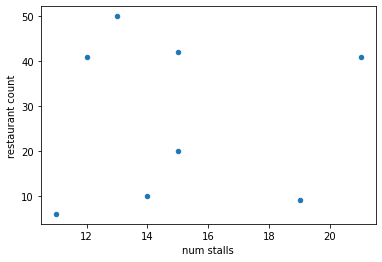

In [21]:
# EDA visulalize the data
mtl_results.plot.scatter(x ='num stalls', y ='restaurant count')

<Axes: xlabel='restaurant count', ylabel='num stalls'>

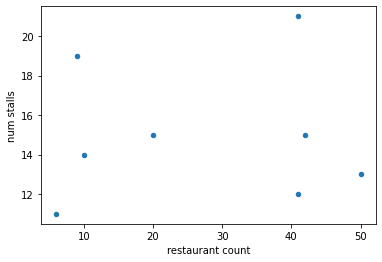

In [22]:
mtl_results.plot.scatter(x ='restaurant count', y ='num stalls')

## code from part 1 

In [3]:
# get network data
city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()

# view json in nice format
JSON(city_bike_networks)

<IPython.core.display.JSON object>

In [4]:
#get data for certain network_id
network_id = 'bixi-montreal'
network_json = requests.get("http://api.citybik.es/v2/networks/"+network_id).json()
JSON(network_json)

<IPython.core.display.JSON object>

In [5]:
# get all locations into a data frame
def locations(data):
    country_list= []
    city_list = []
    lat_list = []
    long_list = []
    id_list = []
    for index in range(len(city_bike_networks['networks'])):
        net_id = city_bike_networks['networks'][index]['id']
        country = city_bike_networks['networks'][index]['location']['country']
        city = city_bike_networks['networks'][index]['location']['city']
        latitude = city_bike_networks['networks'][index]['location']['latitude'] 
        longitude = city_bike_networks['networks'][index]['location']['longitude']
        id_list.append(net_id)
        country_list.append(country)
        city_list.append(city)
        lat_list.append(latitude)
        long_list.append(longitude)
    all_locations = pd.DataFrame({'Country':country_list,'City':city_list, 'Latitude': lat_list, 'Longitude': long_list, 'id': id_list})
    return all_locations

all_locs = locations(city_bike_networks)

In [6]:
mtl_stations = pd.DataFrame()
data = network_json['network']
station_id_list = []
lat_list = []
long_list = []
free_list = []
empty_list = []
total_list = []
for index in range(len(data)):
    station_id = network_json['network']['stations'][index]['id']
    station_id_list.append(station_id)
    lat = network_json['network']['stations'][index]['latitude']
    lat_list.append(lat)
    long = network_json['network']['stations'][index]['longitude']
    long_list.append(long)
    free_bikes = network_json['network']['stations'][index]['free_bikes']
    free_list.append(free_bikes)
    empty_slots = network_json['network']['stations'][index]['empty_slots']
    empty_list.append(empty_slots)
    total = free_bikes+empty_slots
    total_list.append(total)

    mtl_stations = pd.DataFrame({'station ids':station_id_list,'latitude': lat_list, 
                             'longitude': long_list, 'free bikes': free_list, 'empty slots':empty_list, 'total bikes': total_list})
mtl_stations

,station ids,latitude,longitude,free bikes,empty slots,total bikes
0,72bfd647b3d2b650546f42319729757d,45.617500,-73.606011,3,8,11
1,36c6491aa1b52e5ef7005f984738de27,45.516926,-73.564257,8,7,15
2,30f081e03c42b3e7b3a5c4cd5acc3286,45.541549,-73.565012,0,11,11
3,8db822a266b5ccb3a1e323ddc8721d62,45.506176,-73.711186,9,10,19
4,660275cd7d4368cc7590f1606c633bd6,45.512994,-73.682498,1,17,18
5,fddada5adc997290212b3f540c017274,45.514734,-73.691449,5,10,15
6,83d02cd8a043b8305a4031063005d32e,45.522341,-73.721679,7,8,15
7,888e6052f1aebab8d8a527776b3499b6,45.566869,-73.641017,7,8,15


Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [7]:
# foursquare results for everything within 1000 m of each station location

mtl_stations[['station ids','latitude','longitude']]
# print(type(mtl_stations))


,station ids,latitude,longitude
0,72bfd647b3d2b650546f42319729757d,45.617500,-73.606011
1,36c6491aa1b52e5ef7005f984738de27,45.516926,-73.564257
2,30f081e03c42b3e7b3a5c4cd5acc3286,45.541549,-73.565012
3,8db822a266b5ccb3a1e323ddc8721d62,45.506176,-73.711186
4,660275cd7d4368cc7590f1606c633bd6,45.512994,-73.682498
5,fddada5adc997290212b3f540c017274,45.514734,-73.691449
6,83d02cd8a043b8305a4031063005d32e,45.522341,-73.721679
7,888e6052f1aebab8d8a527776b3499b6,45.566869,-73.641017


In [8]:
# get lat long as strings 
def get_venues(mtl_stations):
    lat, long = mtl_stations['latitude'].astype('str'), mtl_stations['longitude'].astype('str')
    return lat, long
get_venues(mtl_stations)


(0    45.617499783128075
 1    45.516926210319546
 2     45.54154850456526
 3    45.506175841460966
 4      45.5129938566323
 5     45.51473429416659
 6     45.52234149817879
 7    45.566869345371856
 Name: latitude, dtype: object,
 0    -73.60601127147675
 1    -73.56425732374191
 2    -73.56501236557959
 3    -73.71118605136871
 4    -73.68249848484993
 5    -73.69144901633263
 6    -73.72167885303497
 7    -73.64101678133011
 Name: longitude, dtype: object)

In [9]:
for location in mtl_stations:
    get_bars(lat, long) 

NameError: name 'get_bars' is not defined

#### Model Building Blocks

In [23]:
import statsmodels.api as sm

In [24]:
X = mtl_results['restaurant count']
y = pd.Series(mtl_results['num stalls'])

In [25]:
y

0    11
1    13
2    12
3    19
4    21
5    15
6    15
7    14
Name: num stalls, dtype: int64

In [26]:
# make a regresssion to predict the num of restaurants based on the num of stalls available 
x = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,x)
print('x type:', type(x))

x type: <class 'pandas.core.frame.DataFrame'>


In [27]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             num stalls   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.163
Method:                 Least Squares   F-statistic:                   0.02041
Date:                Wed, 19 Apr 2023   Prob (F-statistic):              0.891
Time:                        09:30:21   Log-Likelihood:                -20.647
No. Observations:                   8   AIC:                             45.29
Df Residuals:                       6   BIC:                             45.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.6955      2.499  

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Analysis:

* very high p-value of 0.891 indicates there is not a statistically significant relationship between the the number of restaurants to effectively predict the # of stalls available
* very small r-square value of 0.003 indicates that this model explains less than 0.3% of the patterns in the data. 
* conclusion: not a strong model. Need to either look at other variables, or increase the # of stations. Even with the maximum results from foursquare. 

### Extra - non mvp 

In [19]:
restaurant_name_list = []
for index, row in mtl_stations.iterrows():
    r1 = get_bars(row['latitude'], row['longitude'])
    latitude = row['latitude']
    longitude = row['longitude']
    for item in r1['results']:
        restaurant_name = item['name']
        restaurant_name_list.append(restaurant_name)
    # print(restaurant_name_list)
# TO DO - bring in lat and long data and sation id info into output
    # 
    # restaurant_name = r1['results']['name']
    

# distance_list

# popularity_list 


In [11]:
restaurant_names = []
for index in range(len(result['results'])):
    restaurant_names.append(result['results'][index]['name'])
print(restaurant_names)


['Allô Mon Coco', 'Restaurant Prima Luna', 'Pizzeria Etc']


In [13]:
distances_list = []
for index in range(len(result['results'])):
    distances_list.append(result['results'][index]['distance'])
print(distances_list)

[841, 910, 931]


In [15]:
popularity_list = []
for index in range(len(result['results'])):
    popularity_list.append(result['results'][index]['popularity'])
print(popularity_list)

[0.8117385178256391, 0.9710385166416046, 0.8565423825141788]


In [23]:
rating_list = []
for index in range(len(result['results'])):
    try:
        rating_list.append(result['results'][index]['rating'])
    except:
        rating_list.append('None')
print(rating_list)

['None', 7.4, 'None']


Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [20]:
latitude

45.566869345371856

Put your parsed results into a DataFrame

In [22]:
#
restaurants = pd.DataFrame({'station id': ******, 'station latitude': latitude*len(****), 'station longitude': longitude*len(***), 'Restaurant name': restaurant_names,'distance': distances_list, 'Rating': rating_list, 'Popularity': popularity_list})

restaurants

,Restaurant name,distance,Rating,Popularity
0,Allô Mon Coco,841,NaN,0.811739
1,Restaurant Prima Luna,910,7.4,0.971039
2,Pizzeria Etc,931,NaN,0.856542
